##  数据探索

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import scipy.cluster.hierarchy as sch # 层次聚类
from scipy.spatial.distance import pdist, squareform # pair-wise distance样本距离计算，pdist返回向量形式，squareform返回矩阵形式
from sklearn import preprocessing, neighbors, cluster, metrics, manifold, decomposition
import warnings
warnings.filterwarnings('ignore') # 不显示warning信息
sns.set_context('notebook')
%matplotlib inline
%config InlineBackend.figure_format = 'retina' #调整notebook中图片输出的清晰度，使得在retina屏幕上显示的更清楚

np.set_printoptions(precision=5, suppress=True)  # 设置浮点数显示位数，尽量不用科学计数法表示


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-16-a7accba4dcbe>, line 4)

In [51]:
'''

import sys# print sys.getdefaultencoding()# ipython notebook中默认是ascii编码 
reload(sys)
sys.setdefaultencoding('utf8') 
'''

In [18]:
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})

read data

In [3]:
trainraw=pd.read_excel("F:\UNI\junior1\IDS\project1\GPA\TrainData.xlsx" )

In [8]:
trainraw

,学生ID,生源省市,性别,出生日期,民族,政治面貌,裸眼视力(左),裸眼视力(右),色盲,身高,...,优惠加分,大类,高三排名,成绩方差,进步情况,专利数,社会活动,获奖数,竞赛成绩,综合GPA
0,ef355c40867321131ef3,云南省,女,1999,汉族,中国共产主义青年团团员,4.5,4.1,非色盲,154,...,0,国家专项,0.00146413,4.318662e-06,-0.003729,NaN,NaN,3.0,0.0,0.00000
1,106d03d9af9bb4e7ec9a,北京市,女,1998,汉族,中国共产主义青年团团员,4.0,4.3,非色盲,160,...,0,普通,0.0208333,3.887298e-05,0.014736,NaN,1.0,1.0,0.0,0.00000
2,e2109c8762f038238083,北京市,女,1998,汉族,群众,4.0,4.0,非色盲,158,...,60,博雅,0.123693,0.000000e+00,NaN,NaN,3.0,3.0,0.0,0.00000
3,83faa486738cc2254746,湖南省,男,1998,土家族,中国共产主义青年团团员,NaN,NaN,非色盲,176,...,0,普通,0.00128205,6.658218e-04,-0.001967,NaN,2.0,12.0,0.0,0.36382
4,52d4e035cad7bbdecc6c,甘肃省,男,1998,汉族,中国共产主义青年团团员,NaN,NaN,非色盲,178,...,10,博雅,0.00653595,2.073677e-06,0.003225,NaN,1.0,10.0,1.0,0.48169
5,2e356ffa0d376b273670,河南省,男,1998,汉族,中国共产主义青年团团员,4.8,4.8,非色盲,170,...,30,筑梦,0.000338753,3.689372e-08,-0.000417,NaN,NaN,2.0,0.0,0.74389
6,4e54481141747c6617d0,重庆市,男,1997,汉族,中国共产主义青年团团员,0.7,0.2,非色盲,176,...,120,自主,0.0172222,1.227349e-05,0.006151,NaN,2.0,4.0,7.0,0.87768
7,06f54e0c97d18fe06696,新疆维吾尔自治区,男,1998,汉族,中国共产主义青年团团员,NaN,NaN,非色盲,176,...,10,博雅,0.00833333,3.132716e-05,-0.004167,NaN,4.0,11.0,2.0,0.95141
8,a61d3bf79cc621dd14e9,浙江省,男,1996,汉族,中国共产主义青年团团员,1.2,0.8,非色盲,180,...,120,自主,0.190385,2.285638e-03,0.099031,NaN,NaN,5.0,0.0,0.98182
9,527fdd5d6cb2e9252bbc,河北省,男,1998,汉族,中国共产主义青年团团员,4.5,4.5,非色盲,173,...,0,普通,0.0164835,7.287756e-04,-0.081516,NaN,NaN,1.0,0.0,1.27082


In [9]:
trainraw.columns

Index([u'学生ID', u'生源省市', u'性别', u'出生日期', u'民族', u'政治面貌', u'裸眼视力(左)',
       u'裸眼视力(右)', u'色盲', u'身高', u'体重', u'考生类型', u'外语语种', u'学科类型', u'年份',
       u'中学', u'科类', u'成绩', u'投档成绩', u'院系', u'省市', u'优惠加分', u'大类', u'高三排名',
       u'成绩方差', u'进步情况', u'专利数', u'社会活动', u'获奖数', u'竞赛成绩', u'综合GPA'],
      dtype='object')

In [5]:
testraw=pd.read_excel("F:\UNI\junior1\IDS\project1\GPA\TestData.xlsx" )

In [15]:
sns.palplot(sns.cubehelix_palette(8, start=.5, rot=-.75))

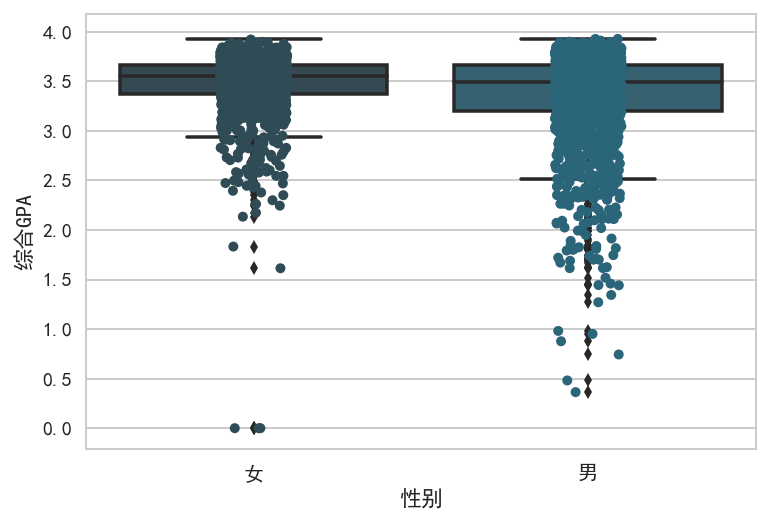

In [26]:
with sns.color_palette("PuBuGn_d"):
    sns.stripplot(x=trainraw[u'性别'],y= trainraw[u'综合GPA'],jitter=True)
    sns.boxplot(x=trainraw[u'性别'],y= trainraw[u'综合GPA'])

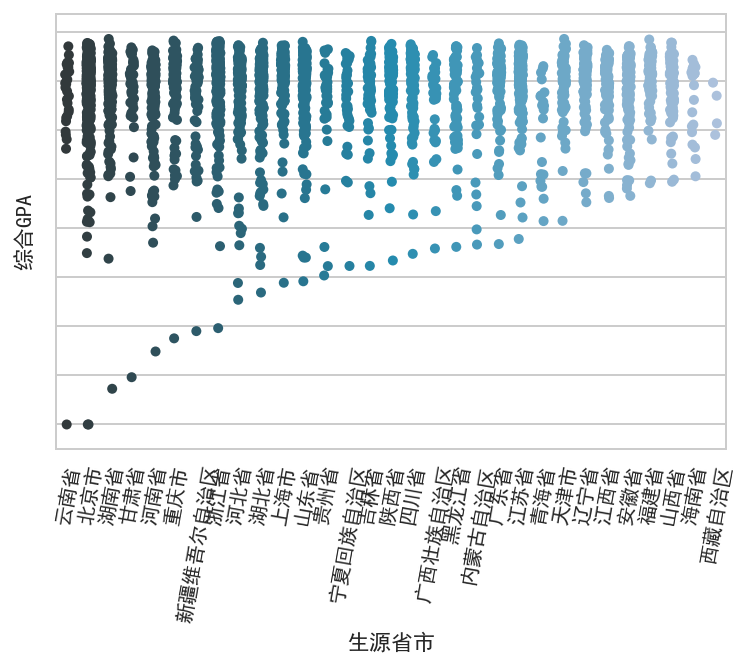

In [20]:
g=sns.stripplot(x=trainraw[u'生源省市'],y= trainraw[u'综合GPA'],
                jitter=True,palette="PuBuGn_d")
g.set_xticklabels(labels=g.get_xticklabels(),rotation =80)
g.set_yticklabels(labels=g.get_yticklabels(),rotation =180) 

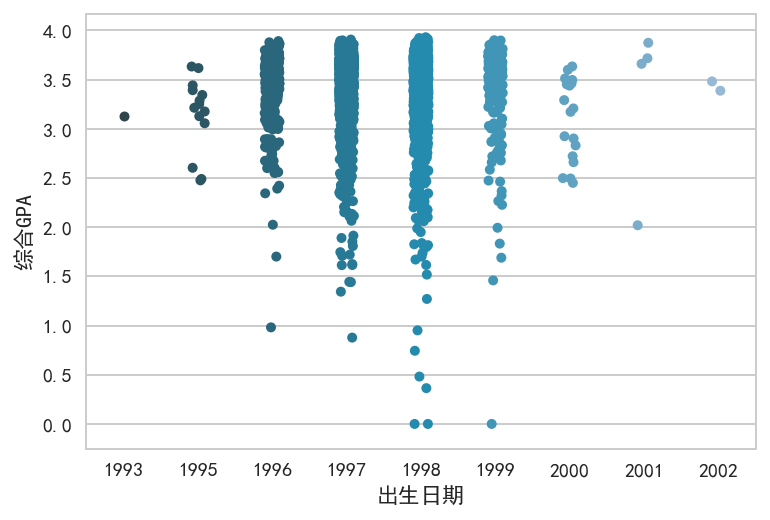

In [38]:
sns.stripplot(x=trainraw[u'出生日期'],y= trainraw[u'综合GPA'],
              jitter=True,palette="PuBuGn_d")

In [83]:
sns.regplot(x=trainraw[u'出生日期'],y= trainraw[u'综合GPA'],
              palette="PuBuGn_d")

TypeError: regplot() got an unexpected keyword argument 'palette'

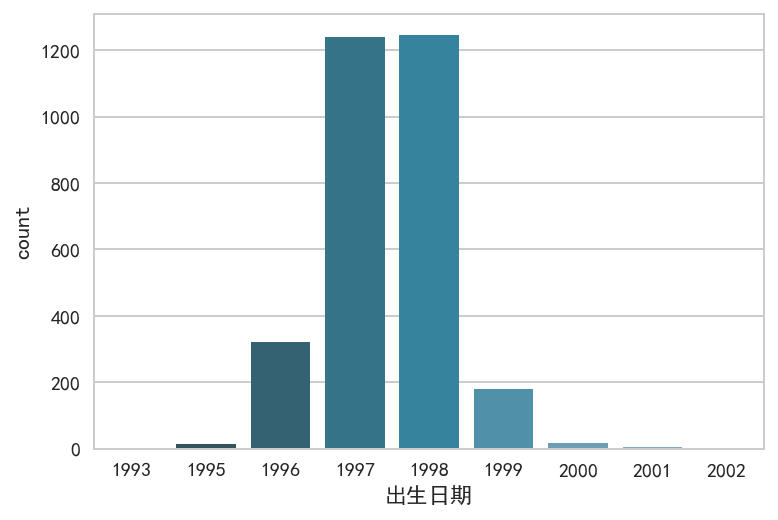

In [76]:
sns.countplot(x=trainraw[u'出生日期'],palette="PuBuGn_d")

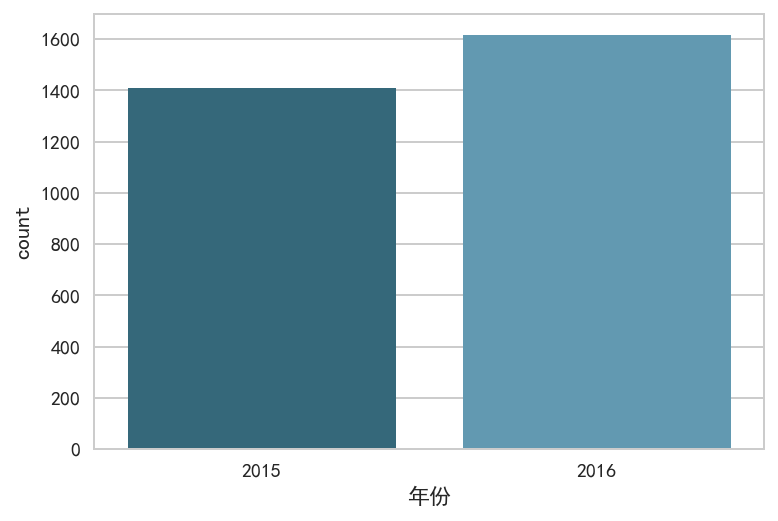

In [77]:
sns.countplot(x=trainraw[u'年份'],palette="PuBuGn_d")

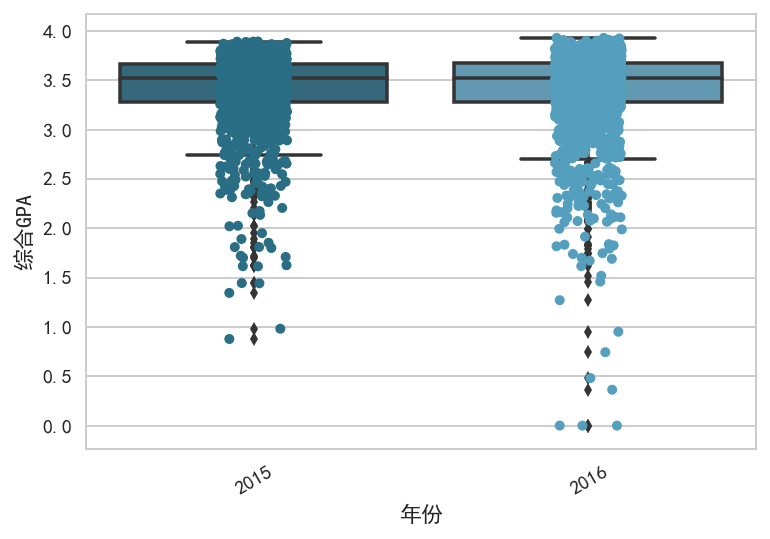

In [82]:
g=sns.stripplot(x=trainraw[u'年份'],y= trainraw[u'综合GPA'],
              jitter=True,palette="PuBuGn_d")
g.set_xticklabels(labels=g.get_xticklabels() ,rotation = 30)
sns.boxplot(x=trainraw[u'年份'],y= trainraw[u'综合GPA'],
              palette="PuBuGn_d")

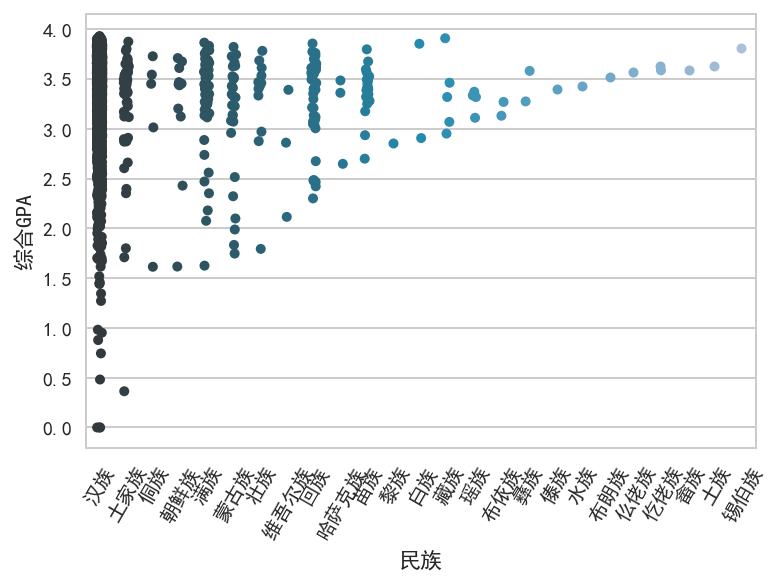

In [77]:
g2=sns.stripplot(x=trainraw[u'民族'],y= trainraw[u'综合GPA'],
              jitter=True,palette="PuBuGn_d")
g2.set_xticklabels(labels=g2.get_xticklabels() ,rotation = 60)

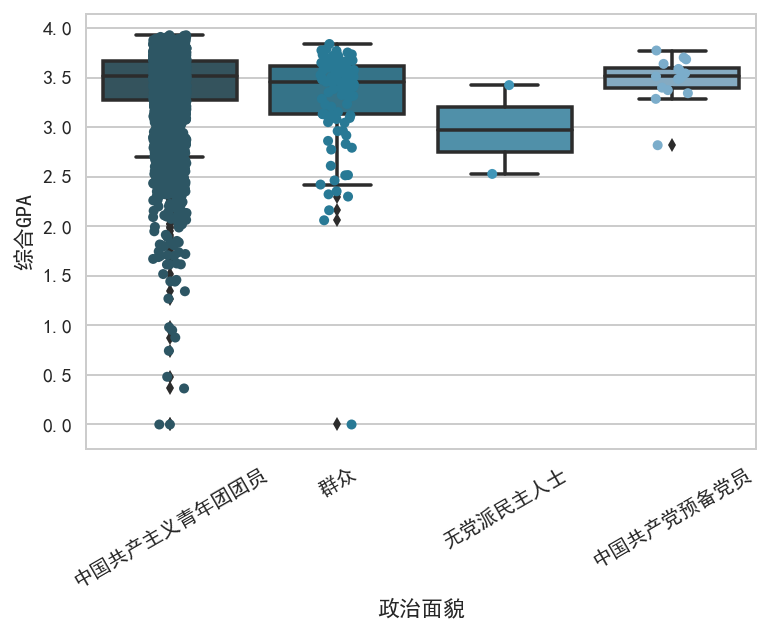

In [32]:
g3=sns.stripplot(x=trainraw[u'政治面貌'],y= trainraw[u'综合GPA'],
              jitter=True,palette="PuBuGn_d")
g3.set_xticklabels(labels=g3.get_xticklabels() ,rotation = 30)
sns.boxplot(x=trainraw[u'政治面貌'],y= trainraw[u'综合GPA'],
              palette="PuBuGn_d")


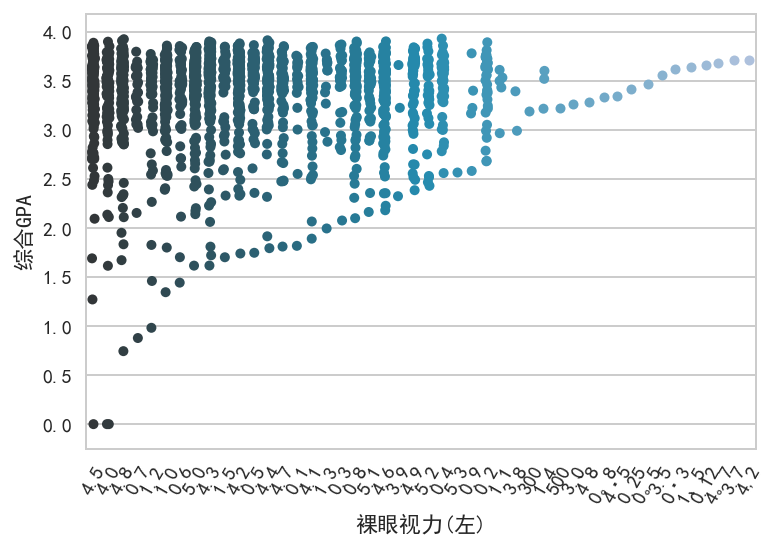

In [82]:
g4=sns.stripplot(x=trainraw[u'裸眼视力(左)'],y= trainraw[u'综合GPA'],
              jitter=True,palette="PuBuGn_d")
g4.set_xticklabels(labels=g4.get_xticklabels() ,rotation = 60)

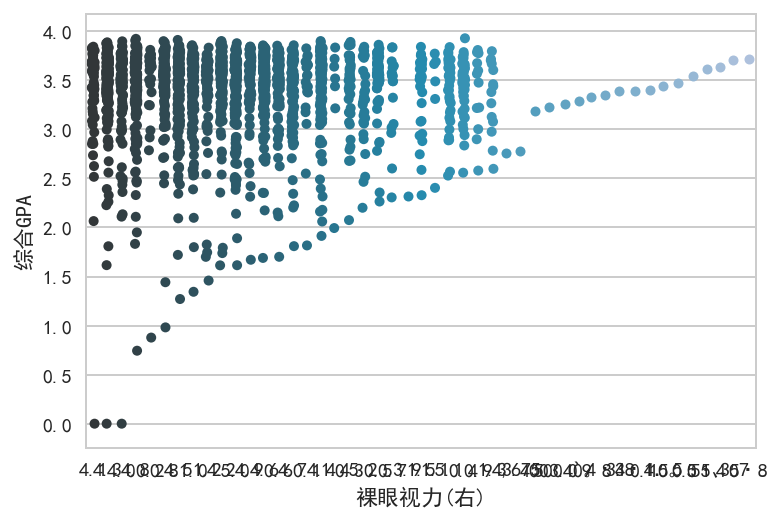

In [72]:
sns.stripplot(x=trainraw[u'裸眼视力(右)'],y= trainraw[u'综合GPA'],
              jitter=True,palette="PuBuGn_d")

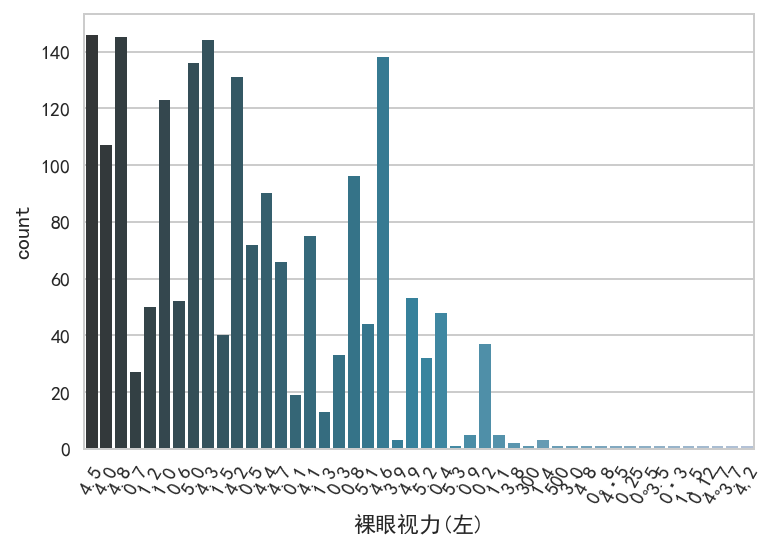

In [94]:
g5=sns.countplot(x=trainraw[u'裸眼视力(左)'],palette="PuBuGn_d")

g5.set_xticklabels(labels=g5.get_xticklabels() ,rotation = 60)

In [84]:
trainraw[u'裸眼视力(左)']

0       4.5
1       4.0
2       4.0
3       NaN
4       NaN
5       4.8
6       0.7
7       NaN
8       1.2
9       4.5
10      1.0
11      0.6
12      NaN
13      1.2
14      NaN
15      4.0
16      5.0
17      4.3
18      NaN
19      4.8
20      4.5
21      1.5
22      0.6
23      NaN
24      4.3
25      4.2
26      0.5
27      4.4
28      1.0
29      4.3
       ... 
2996    0.3
2997    NaN
2998    4.3
2999    4.4
3000    4.3
3001    5.2
3002    NaN
3003    NaN
3004    4.2
3005    NaN
3006    0.8
3007    4.5
3008    4.4
3009    4.3
3010    NaN
3011    NaN
3012    4.3
3013    0.2
3014    NaN
3015    4.0
3016    NaN
3017    0.8
3018    4.3
3019    4.6
3020    4.8
3021    NaN
3022    4.4
3023    4.8
3024    NaN
3025    0.4
Name: 瑁哥溂瑙嗗姏(宸�, Length: 3026, dtype: object

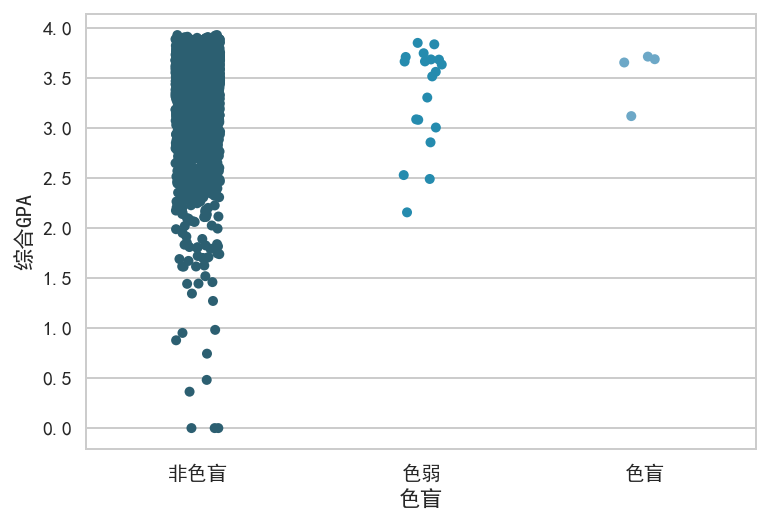

In [95]:
g6=sns.stripplot(x=trainraw[u'色盲'],y= trainraw[u'综合GPA'],
              jitter=True,palette="PuBuGn_d")
g6.set_xticklabels(labels=g6.get_xticklabels() ,rotation = 0)

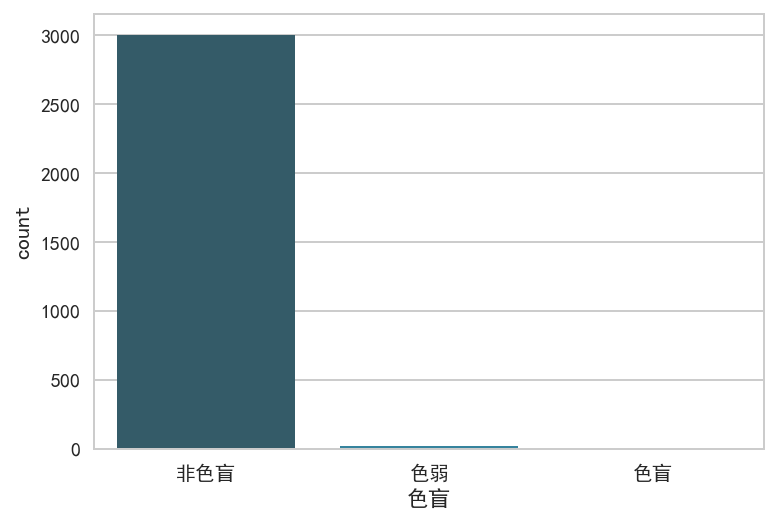

In [33]:
sns.countplot(trainraw[u'色盲'],palette="PuBuGn_d",)

In [ ]:
g6=sns.stripplot(x=trainraw[u'色盲'],y= trainraw[u'综合GPA'],
              jitter=True,palette="PuBuGn_d")
g6.set_xticklabels(labels=g6.get_xticklabels() ,rotation = 0)

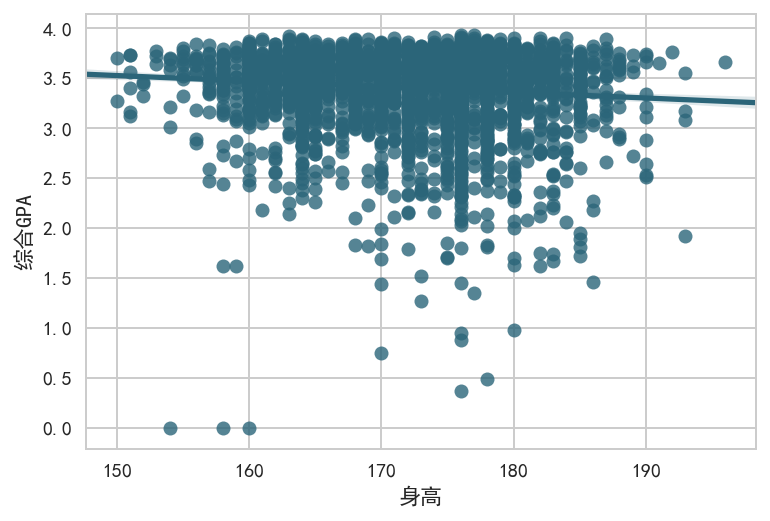

In [107]:
g7=sns.regplot(x=trainraw[u'身高'],y= trainraw[u'综合GPA'],
               color=sns.color_palette("PuBuGn_d")[1])

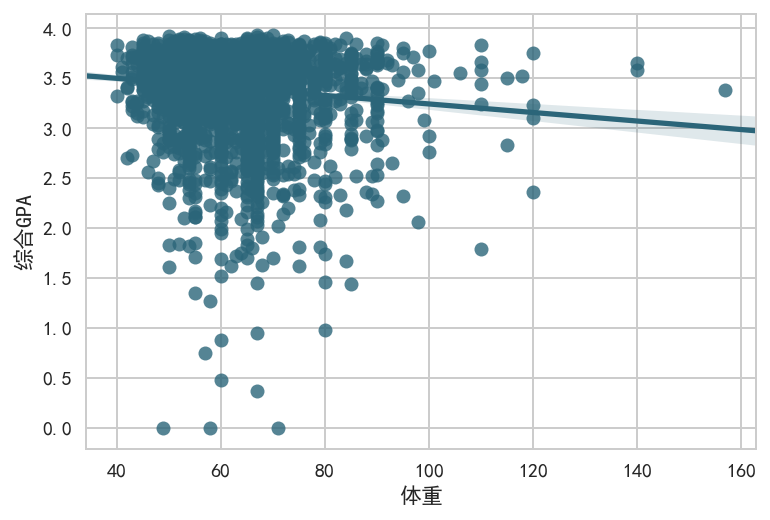

In [109]:
g8=sns.regplot(x=trainraw[u'体重'],y= trainraw[u'综合GPA'],
               color=sns.color_palette("PuBuGn_d")[1])

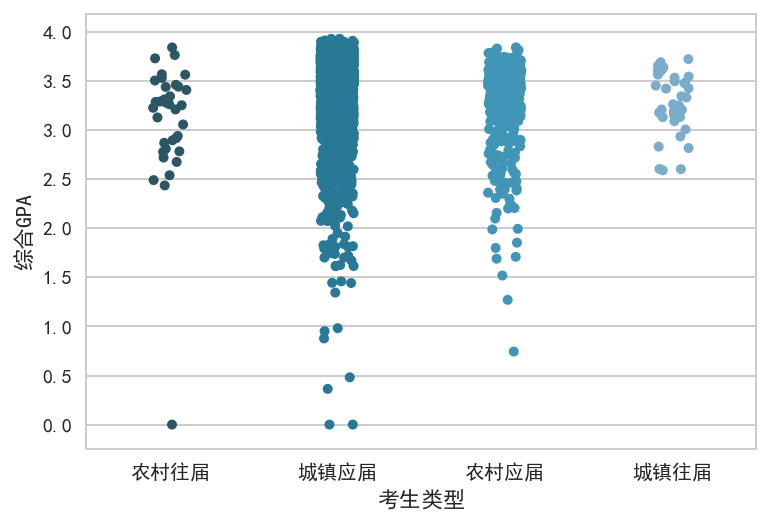

In [110]:
g9=sns.stripplot(x=trainraw[u'考生类型'],y= trainraw[u'综合GPA'],
              jitter=True,palette="PuBuGn_d")
g9.set_xticklabels(labels=g9.get_xticklabels() ,rotation = 0)

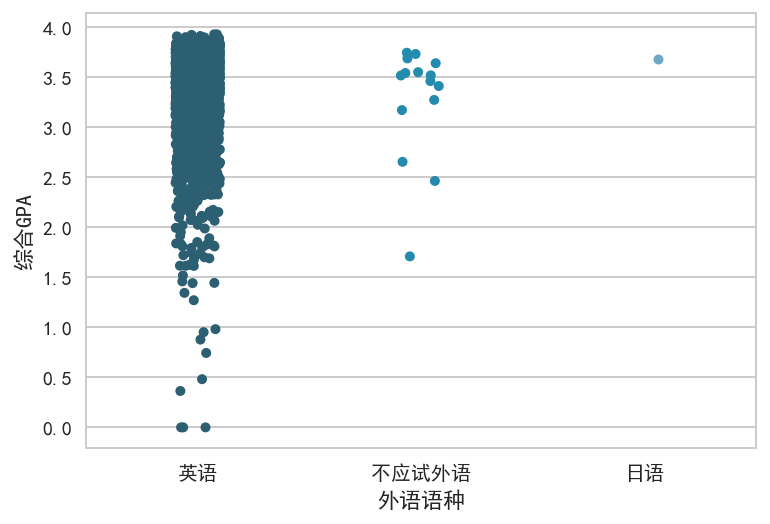

In [111]:
g10=sns.stripplot(x=trainraw[u'外语语种'],y= trainraw[u'综合GPA'],
              jitter=True,palette="PuBuGn_d")
g10.set_xticklabels(labels=g10.get_xticklabels() ,rotation = 0)

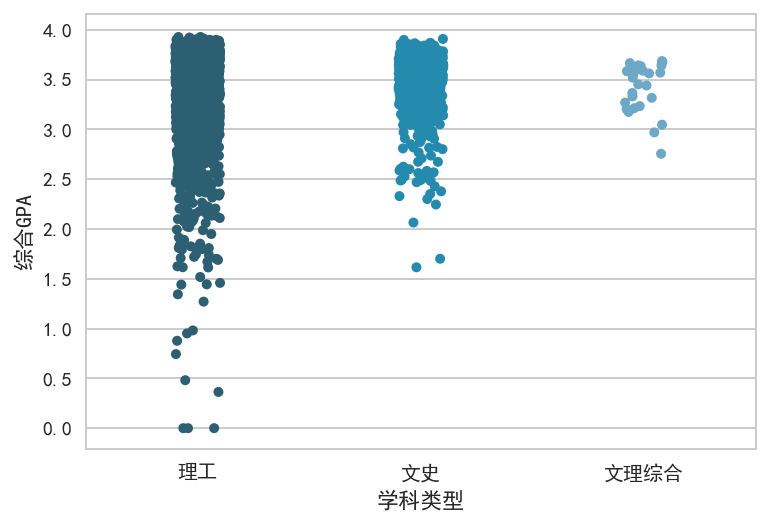

In [112]:
g11=sns.stripplot(x=trainraw[u'学科类型'],y= trainraw[u'综合GPA'],
              jitter=True,palette="PuBuGn_d")
g11.set_xticklabels(labels=g11.get_xticklabels() ,rotation = 0)

[<matplotlib.text.Text at 0xf783f28>, <matplotlib.text.Text at 0xf785ac8>]

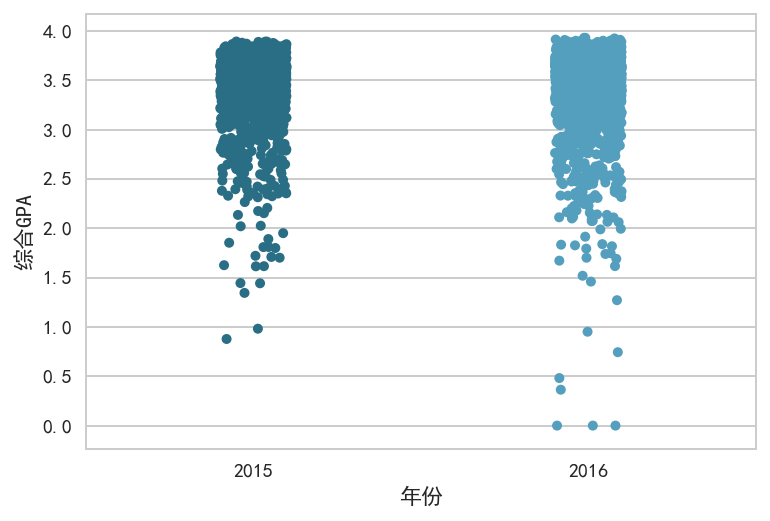

In [118]:
g12=sns.stripplot(x=trainraw[u'年份'],y= trainraw[u'综合GPA'],
              jitter=True,palette="PuBuGn_d")
g12.set_xticklabels(labels=g12.get_xticklabels() ,rotation = 0)

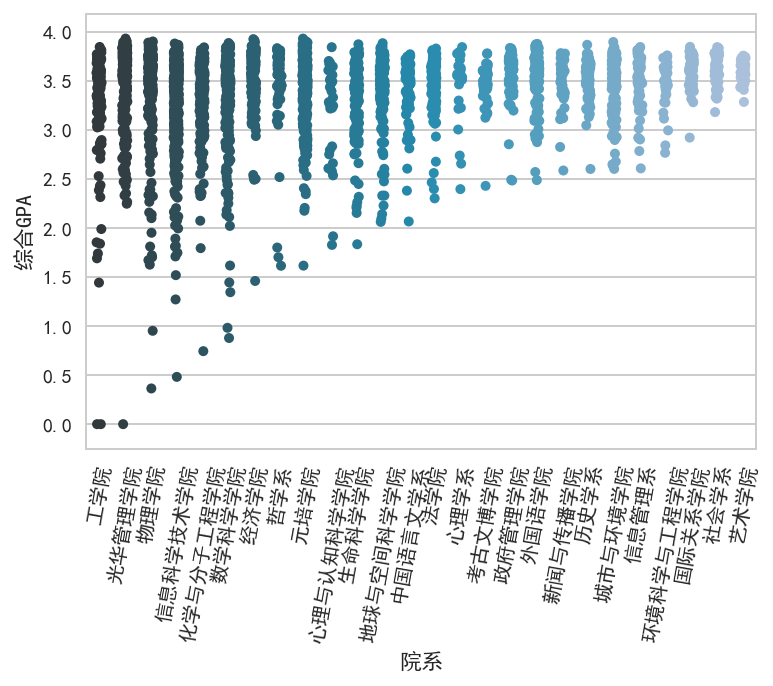

In [120]:
g14=sns.stripplot(x=trainraw[u'院系'],y= trainraw[u'综合GPA'],
              jitter=True,palette="PuBuGn_d")
g14.set_xticklabels(labels=g14.get_xticklabels() ,rotation = 80)

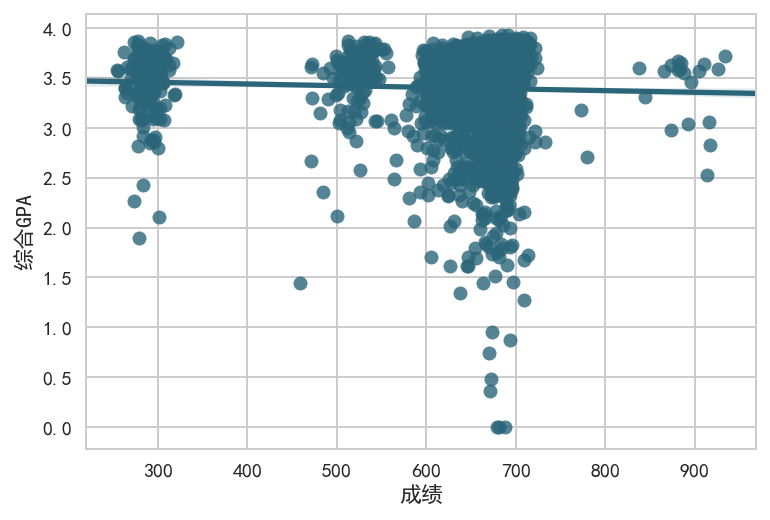

In [121]:
g16=sns.regplot(x=trainraw[u'成绩'],y= trainraw[u'综合GPA'],
               color=sns.color_palette("PuBuGn_d")[1])

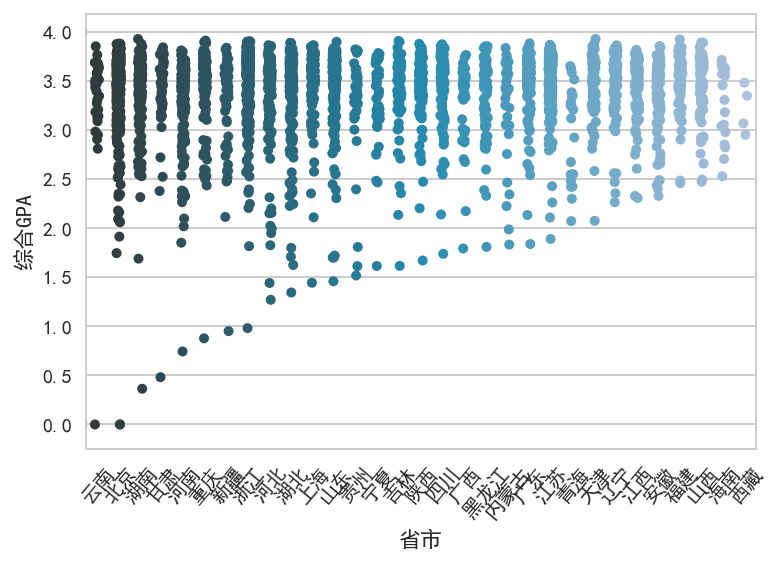

In [124]:
g15=sns.stripplot(x=trainraw[u'省市'],y= trainraw[u'综合GPA'],
              jitter=True,palette="PuBuGn_d")
g15.set_xticklabels(labels=g15.get_xticklabels() ,rotation = 50)

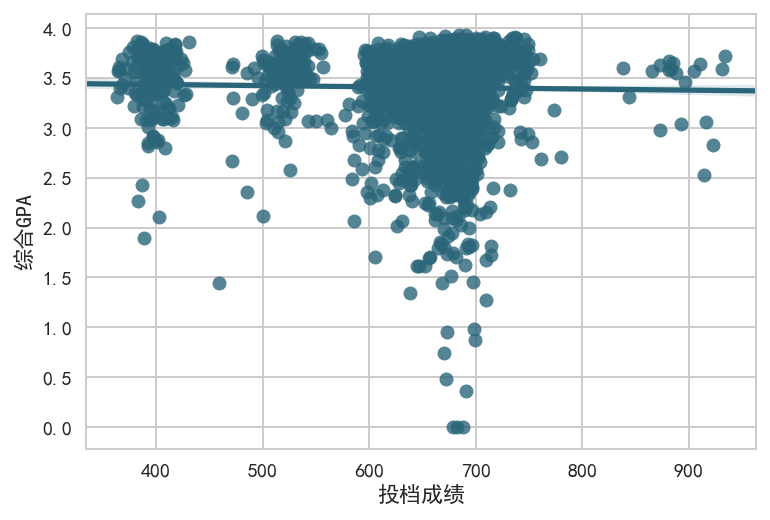

In [122]:
g17=sns.regplot(x=trainraw[u'投档成绩'],y= trainraw[u'综合GPA'],
               color=sns.color_palette("PuBuGn_d")[1])

In [125]:
g18=sns.regplot(x=trainraw[u'高三排名'],y= trainraw[u'综合GPA'],
               color=sns.color_palette("PuBuGn_d")[1])

ValueError: could not convert string to float: 

ValueError: could not convert string to float: 

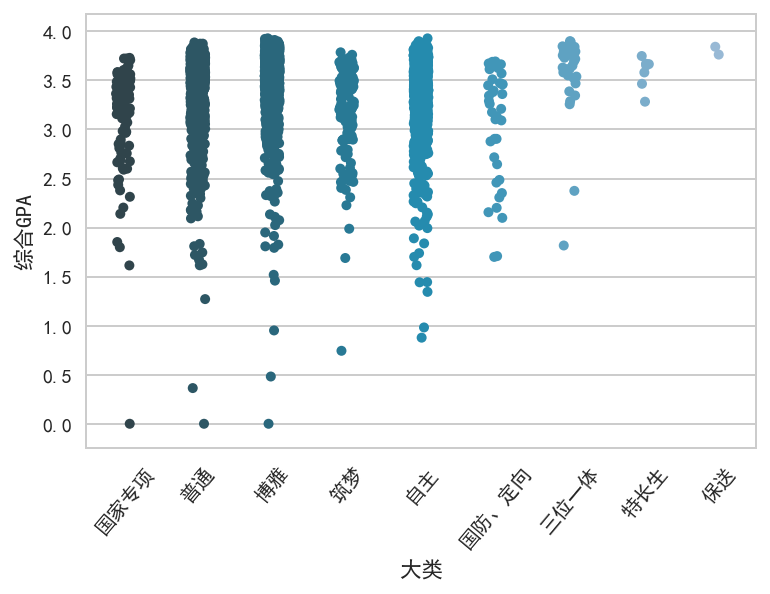

In [21]:
g19=sns.stripplot(x=trainraw[u'大类'],y= trainraw[u'综合GPA'],
              jitter=True,palette="PuBuGn_d")
g19.set_xticklabels(labels=g19.get_xticklabels() ,rotation = 50)

In [10]:
train=pd.read_csv("D:\weixin\WeChat\WeChat Files\J158042591\Files\wxy_TrainData(1).csv",
                  encoding="gb18030")

In [11]:
train.head()

,id,学生ID,生源省市,满分,全国卷,自主命题,半自主命题,性别,民族,政治面貌.群众,...,生源省市22,生源省市23,生源省市24,生源省市25,生源省市26,生源省市27,生源省市28,生源省市29,生源省市30,综合GPA
0,1,6520905ee393ca7c7dc7,宁夏回族自治区,750,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.57018
1,2,c5f7d43ab8328c3108c6,北京市,750,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,3.47444
2,3,78a1a12f2ba616373b7b,广西壮族自治区,750,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.63056
3,4,67349330bfce350d0444,北京市,750,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.81983
4,5,dfcdedc8922db1978f09,重庆市,750,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2.69939


In [13]:
train.columns

Index([u'id', u'学生ID', u'生源省市', u'满分', u'全国卷', u'自主命题', u'半自主命题', u'性别', u'民族',
       u'政治面貌.群众', u'政治面貌.团员', u'政治面貌.党员', u'身高比', u'体重比', u'考生类型.城镇',
       u'考生类型.应届', u'外语语种', u'学科类型.理工', u'学科类型.文史', u'学科类型.综合', u'年份', u'百分比',
       u'学部.理学部', u'学部.经济与管理学部', u'学部.人文学部', u'学部.社会科学学部', u'学部.信息与工程科学部',
       u'加分比', u'大类.普通', u'大类.保送', u'大类.博雅', u'大类.自招', u'大类.国防定向', u'大类.专项',
       u'大类.三位一体', u'大类.筑梦', u'大类.特长生', u'高三排名', u'成绩方差', u'专利数', u'社会活动',
       u'获奖数', u'竞赛成绩', u'生源省市0', u'生源省市1', u'生源省市2', u'生源省市3', u'生源省市4',
       u'生源省市5', u'生源省市6', u'生源省市7', u'生源省市8', u'生源省市9', u'生源省市10', u'生源省市11',
       u'生源省市12', u'生源省市13', u'生源省市14', u'生源省市15', u'生源省市16', u'生源省市17',
       u'生源省市18', u'生源省市19', u'生源省市20', u'生源省市21', u'生源省市22', u'生源省市23',
       u'生源省市24', u'生源省市25', u'生源省市26', u'生源省市27', u'生源省市28', u'生源省市29',
       u'生源省市30', u'综合GPA'],
      dtype='object')

In [78]:
train[u'外语语种']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2996    0
2997    0
2998    0
2999    0
3000    0
3001    0
3002    0
3003    0
3004    0
3005    0
3006    0
3007    0
3008    0
3009    0
3010    0
3011    0
3012    0
3013    1
3014    0
3015    0
3016    0
3017    0
3018    0
3019    0
3020    0
3021    0
3022    0
3023    0
3024    0
3025    0
Name: 外语语种, Length: 3026, dtype: int64

In [166]:
train=train.iloc[:,7:75]

In [57]:
year=trainraw[[u"出生日期",u"年份",u"综合GPA"]]

In [58]:
year.dtypes

出生日期       int64
年份         int64
综合GPA    float64
dtype: object

In [64]:
year

,出生日期,年份,综合GPA
0,1999,2016,0.00000
1,1998,2016,0.00000
2,1998,2016,0.00000
3,1998,2016,0.36382
4,1998,2016,0.48169
5,1998,2016,0.74389
6,1997,2015,0.87768
7,1998,2016,0.95141
8,1996,2015,0.98182
9,1998,2016,1.27082


In [68]:
year.pivot_table(u"综合GPA",u"出生日期",u"年份")

年份,2015,2016
出生日期,,
1993,3.131340,NaN
1995,3.132498,3.392710
1996,3.431434,3.198521
1997,3.424308,3.413722
1998,3.363626,3.404629
1999,3.340883,3.358248
2000,3.511990,3.073009
2001,2.868620,3.767720
2002,NaN,3.434800


In [70]:
newyear=year.pivot_table(u"综合GPA",u"出生日期",u"年份")

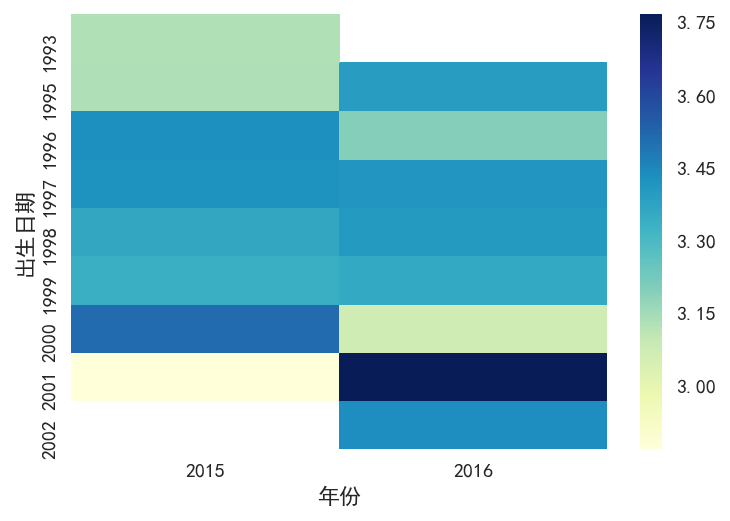

In [80]:
ax = sns.heatmap(newyear,cmap="YlGnBu")

In [51]:
year=year.iloc[0:10,:]

In [53]:
year

,出生日期,年份,综合GPA
0,1999,2016,0.00000
1,1998,2016,0.00000
2,1998,2016,0.00000
3,1998,2016,0.36382
4,1998,2016,0.48169
5,1998,2016,0.74389
6,1997,2015,0.87768
7,1998,2016,0.95141
8,1996,2015,0.98182
9,1998,2016,1.27082
